In [16]:
import Potapov_Code.Roots as Roots
import Potapov_Code.Potapov as Potapov
import Potapov_Code.Time_Delay_Network as Time_Delay_Network
import Potapov_Code.Time_Sims_nonlin as Time_Sims_nonlin
import Potapov_Code.functions as functions
import Potapov_Code.Hamiltonian as Hamiltonian
import scipy.constants as consts

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sympy import init_printing
init_printing() 

In [12]:

## Make a sample Time_Delay_Network, changing some parameters.
X = Time_Delay_Network.Example3(r1 = 0.7, r3 = 0.7, max_linewidth=35.,max_freq=15)

## run the Potapov procedure.
## Setting commensurate_roots to True will tell the program to identify
## the roots utilizing the periodic structure of the roots.
X.run_Potapov(commensurate_roots = True)

## Get the roots, modes, and delays from the Time_Delay_Network.
modes = X.spatial_modes
roots = X.roots
delays = X.delays

## Generated doubled-up ABCD matrices for the passive system.
## These matrices are not doubled up
A,B,C,D = X.get_Potapov_ABCD(doubled=False)

## Generated doubled-up ABCD matrices for the passive system.
## These matrices not doubled up
A_d,B_d,C_d,D_d = X.get_Potapov_ABCD(doubled=True)

M = len(A)

In [3]:
## make an instance of Hamiltonian.
ham = Hamiltonian.Hamiltonian(roots,modes,delays,Omega=-1j*A)

In [4]:
## Add a chi nonlinearity to ham.
ham.make_chi_nonlinearity(delay_indices=[0],start_nonlin=0,
                             length_nonlin=0.1*consts.c,
                             chi_order=3)

In [6]:
## Make the Hamiltonian expression
H = ham.make_H()

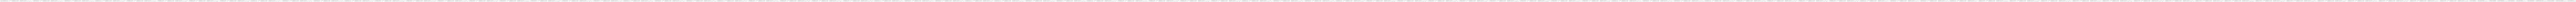

In [ ]:
H

In [10]:
## Make the classical equation of motion
eq_mot = ham.make_eq_motion()
a_in = lambda t: np.asmatrix([1.]*np.shape(D_d)[-1]).T  ## make a sample input function

## find f for the linear and nonlinear systems
f = Time_Sims_nonlin.make_f(eq_mot,B_d,a_in)
f_lin = Time_Sims_nonlin.make_f_lin(A_d,B_d,a_in)

In [23]:
## Simulate the systems (both linear and nonlinear).
Y_lin = Time_Sims_nonlin.run_ODE(f_lin, a_in, C_d, D_d, 2*M, T = 15, dt = 0.01)
Y_nonlin = Time_Sims_nonlin.run_ODE(f, a_in, C_d, D_d, 2*M, T = 15, dt = 0.01)

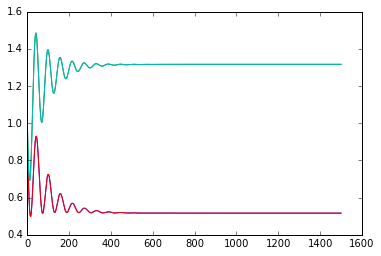

In [30]:
for i in range(len(Y_lin[0])):
    plt.plot(map(abs,[y[i,0] for y in Y_lin] ))

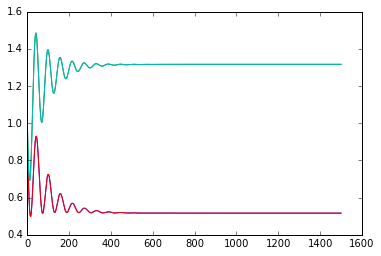

In [31]:
for i in range(len(Y_lin[0])):
    plt.plot(map(abs,[y[i,0] for y in Y_nonlin] ))